Data cleaning

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
df=pd.read_csv('fifa21_raw_data.csv')
print("fitst 5 rows of the data")
print(df.head())

fitst 5 rows of the data
                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                       LongName  \
0                  Lionel Messi   
1  C. Ronaldo dos Santos Aveiro   
2                     Jan Oblak   
3               Kevin De Bruyne   
4    Neymar da Silva Santos Jr.   

                                           playerUrl Nationality Positions  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina  RW ST CF   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal     ST LW   
2  http://sofifa.com/player/200389/jan-oblak/210005/    Slovenia        GK   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium    CAM CM   
4  http://sofifa.com/player/190871/neymar-d

/tmp/ipython-input-1052597607.py:4: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fifa21_raw_data.csv')


In [ ]:
print("\Dataframe info:")
df.info()

\Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-2003849563.py:1: SyntaxWarning: invalid escape sequence '\D'
  print("\Dataframe info:")


In [ ]:
print("unique height values:")
print(df['Height'].unique())

unique height values:
['5\'7"' '6\'2"' '5\'11"' '5\'9"' '6\'0"' '5\'10"' '6\'3"' '6\'4"' '6\'1"'
 '6\'6"' '5\'8"' '5\'6"' '6\'5"' '5\'5"' '5\'4"' '6\'7"' '5\'2"' '5\'3"'
 '6\'8"' '5\'1"' '6\'9"']


In [ ]:
def convert_height(height):
    if "cm" in height:
        # This handles values like '170cm'
        return int(height.replace("cm", ""))
    elif "'" in height:
        # This handles values like "5'7\""
        parts = height.split("'")
        feet = int(parts[0])
        inches = int(parts[1].replace('"', ''))
        # Convert feet and inches to cm, then add them
        return int((feet * 30.48) + (inches * 2.54))

# Apply our new function to the entire 'Height' column
df['Height'] = df['Height'].apply(convert_height)

# Rename the column to be more specific
df.rename(columns={'Height': 'Height(cm)'}, inplace=True)

# Check our work by printing the first 5 rows of the cleaned column
print("Height column after cleaning (now in cm):")
print(df['Height(cm)'].head())

Height column after cleaning (now in cm):
0    170
1    187
2    187
3    180
4    175
Name: Height(cm), dtype: int64


In [ ]:
# See all the unique values in the 'Weight' column
print("Unique Weight values:")
print(df['Weight'].unique())

Unique Weight values:
['159lbs' '183lbs' '192lbs' '154lbs' '150lbs' '176lbs' '161lbs' '201lbs'
 '157lbs' '152lbs' '203lbs' '187lbs' '185lbs' '212lbs' '179lbs' '181lbs'
 '165lbs' '190lbs' '196lbs' '163lbs' '168lbs' '141lbs' '172lbs' '198lbs'
 '146lbs' '132lbs' '207lbs' '174lbs' '148lbs' '143lbs' '130lbs' '134lbs'
 '194lbs' '205lbs' '214lbs' '170lbs' '137lbs' '139lbs' '209lbs' '220lbs'
 '128lbs' '216lbs' '227lbs' '218lbs' '123lbs' '225lbs' '223lbs' '126lbs'
 '121lbs' '229lbs' '236lbs' '243lbs' '117lbs' '110lbs' '119lbs' '115lbs']


In [ ]:
def convert_weight(weight):
    if "kg" in weight:
        return int(weight.replace("kg", ""))
    elif "lbs" in weight:
        # Convert lbs to kg (1 lbs = 0.453592 kg)
        pounds = int(weight.replace("lbs", ""))
        return int(pounds * 0.453592)

# Apply the function to the 'Weight' column
df['Weight'] = df['Weight'].apply(convert_weight)

# Rename the column
df.rename(columns={'Weight': 'Weight(kg)'}, inplace=True)

# Check our work
print("\nWeight column after cleaning (now in kg):")
print(df['Weight(kg)'].head())


Weight column after cleaning (now in kg):
0    72
1    83
2    87
3    69
4    68
Name: Weight(kg), dtype: int64


In [ ]:
# See the unique values in the 'Value' column
print("Unique Value values (sample):")
print(df['Value'].unique()[:10])

Unique Value values (sample):
['€67.5M' '€46M' '€75M' '€87M' '€90M' '€80M' '€105.5M' '€62.5M' '€78M'
 '€75.5M']


In [ ]:
def parse_value(value_str):
    value_str = str(value_str).replace('€', '')
    if 'M' in value_str:
        return float(value_str.replace('M', '')) * 1000000
    elif 'K' in value_str:
        return float(value_str.replace('K', '')) * 1000
    else:
        return int(value_str)

# Apply this function to all three monetary columns
df['Value'] = df['Value'].apply(parse_value)
df['Wage'] = df['Wage'].apply(parse_value)
df['Release Clause'] = df['Release Clause'].apply(parse_value)

# Check our work
print("\nMonetary columns after cleaning:")
print(df[['Value', 'Wage', 'Release Clause']].head())


Monetary columns after cleaning:
        Value      Wage  Release Clause
0  67500000.0  560000.0     138400000.0
1  46000000.0  220000.0      75900000.0
2  75000000.0  125000.0     159400000.0
3  87000000.0  370000.0     161000000.0
4  90000000.0  270000.0     166500000.0


In [ ]:
# See the first 5 entries for 'Team & Contract'
print("Original 'Team & Contract' data:")
print(df['Team & Contract'].head())

Original 'Team & Contract' data:
0           \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1               \n\n\n\nJuventus\n2018 ~ 2022\n\n
2        \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3        \n\n\n\nManchester City\n2015 ~ 2023\n\n
4    \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
Name: Team & Contract, dtype: object


In [ ]:
# --- FIX for Step 6 ---

# 1. Re-assign the 'Team' column to the correct index (index 4)
df['Team'] = contract_info[4]

# 2. Re-assign the 'Contract' column to the correct index (index 5)
df['Contract'] = contract_info[5]

# 3. Let's also clean up any leading/trailing whitespace
df['Team'] = df['Team'].str.strip()
df['Contract'] = df['Contract'].str.strip()

# Now, check our work again. This should look correct.
print("Corrected 'Team' and 'Contract' columns:")
print(df[['Team', 'Contract']].head())

Corrected 'Team' and 'Contract' columns:
                  Team     Contract
0         FC Barcelona  2004 ~ 2021
1             Juventus  2018 ~ 2022
2      Atlético Madrid  2014 ~ 2023
3      Manchester City  2015 ~ 2023
4  Paris Saint-Germain  2017 ~ 2022


In [ ]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,ID,Height(cm),Weight(kg),foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,158023,170,72,Left,93,RW,0,"Jul 1, 2004",NaN,67500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372,FC Barcelona,2004 ~ 2021
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,187,83,Right,92,ST,0,"Jul 10, 2018",NaN,46000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344,Juventus,2018 ~ 2022
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,200389,187,87,Right,91,GK,2,"Jul 16, 2014",NaN,75000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86,Atlético Madrid,2014 ~ 2023
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,180,69,Right,91,CAM,0,"Aug 30, 2015",NaN,87000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163,Manchester City,2015 ~ 2023
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,190871,175,68,Right,91,LW,0,"Aug 3, 2017",NaN,90000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273,Paris Saint-Germain,2017 ~ 2022


In [ ]:
# Convert the 'Joined' column to datetime objects
df['Joined'] = pd.to_datetime(df['Joined'])

# Check our work
print("'Joined' column after cleaning:")
print(df[['Name', 'Joined']].head())

print("\nData type of 'Joined' column:")
print(df['Joined'].dtype)

'Joined' column after cleaning:
                Name     Joined
0           L. Messi 2004-07-01
1  Cristiano Ronaldo 2018-07-10
2           J. Oblak 2014-07-16
3       K. De Bruyne 2015-08-30
4          Neymar Jr 2017-08-03

Data type of 'Joined' column:
datetime64[ns]


In [ ]:
# See all the unique values in the 'W/F' column
print("Unique W/F values:")
print(df['W/F'].unique())

Unique W/F values:
['4 ★' '3 ★' '5 ★' '2 ★' '1 ★']


In [ ]:
# Remove the '★' symbol and convert columns to integer
df['W/F'] = df['W/F'].str.replace('★', '').astype(int)
df['SM'] = df['SM'].str.replace('★', '').astype(int)
df['IR'] = df['IR'].str.replace('★', '').astype(int)

# Check our work
print("\nStar-rated columns after cleaning:")
print(df[['W/F', 'SM', 'IR']].head())

print("\nData types:")
print(df[['W/F', 'SM', 'IR']].dtypes)


Star-rated columns after cleaning:
   W/F  SM  IR
0    4   4   5
1    4   5   5
2    3   1   3
3    5   4   4
4    5   5   5

Data types:
W/F    int64
SM     int64
IR     int64
dtype: object


In [ ]:
# See a sample of unique values in 'Hits'
print("Unique Hits values (sample):")
print(df['Hits'].unique()[:20])

Unique Hits values (sample):
['\n372' '\n344' '\n86' '\n163' '\n273' '\n182' '\n646' '\n79' '\n164'
 '\n170' '\n93' '\n131' '\n89' '\n90' '\n169' '\n187' '\n103' '\n317'
 '\n239' '\n56']


In [ ]:
def convert_hits(hits_str):
    hits_str = str(hits_str) # Make sure it's a string
    if 'K' in hits_str:
        # Remove 'K', convert to float, and multiply by 1000
        return float(hits_str.replace('K', '')) * 1000
    else:
        # It's just a number, convert it to integer
        return int(hits_str)

# Apply this function to the 'Hits' column
df['Hits'] = df['Hits'].apply(convert_hits)

# We can also rename it for clarity
df.rename(columns={'Hits': 'Profile Hits'}, inplace=True)

# Check our work
print("\n'Profile Hits' column after cleaning:")
print(df['Profile Hits'].head())

print("\nData type of 'Profile Hits' column:")
print(df['Profile Hits'].dtype)


'Profile Hits' column after cleaning:
0    372.0
1    344.0
2     86.0
3    163.0
4    273.0
Name: Profile Hits, dtype: float64

Data type of 'Profile Hits' column:
float64


Missing value


In [ ]:
# Check the percentage of missing values for each column
print("Percentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

# Drop columns that are mostly empty or not useful for analysis
columns_to_drop = ['Loan Date End', 'photoUrl', 'playerUrl', 'ID']
df.drop(columns_to_drop, axis=1, inplace=True)

# Check our work
print(f"\nSuccessfully dropped {columns_to_drop}.")
print("\nDataFrame info after dropping columns:")
df.info()

Percentage of missing values:
photoUrl        0.000000
LongName        0.000000
playerUrl       0.000000
Nationality     0.000000
Positions       0.000000
                  ...   
DEF             0.000000
PHY             0.000000
Profile Hits    0.000000
Team            0.000000
Contract        1.254018
Length: 78, dtype: float64

Successfully dropped ['Loan Date End', 'photoUrl', 'playerUrl', 'ID'].

DataFrame info after dropping columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   LongName          18979 non-null  object        
 1   Nationality       18979 non-null  object        
 2   Positions         18979 non-null  object        
 3   Name              18979 non-null  object        
 4   Age               18979 non-null  int64         
 5   ↓OVA              18979 non-null  int64         
 6   POT       

Data Exploration

In [ ]:
# Get a statistical summary of all numerical columns
print(df.describe())

                Age          ↓OVA           POT    Height(cm)    Weight(kg)  \
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean      25.194583     65.718636     71.136098    180.655619     74.542652   
min       16.000000     47.000000     47.000000    154.000000     49.000000   
25%       21.000000     61.000000     67.000000    175.000000     69.000000   
50%       25.000000     66.000000     71.000000    180.000000     74.000000   
75%       29.000000     70.000000     75.000000    185.000000     79.000000   
max       53.000000     93.000000     95.000000    205.000000    110.000000   
std        4.710753      6.968999      6.114176      6.779817      7.084202   

                BOV        Growth                         Joined  \
count  18979.000000  18979.000000                          18979   
mean      66.751620      5.417461  2018-09-13 07:52:09.585331200   
min       48.000000      0.000000            1998-01-01 00:00:00   
25%       62.000

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# This makes our plots look a bit nicer
sns.set_style("whitegrid")

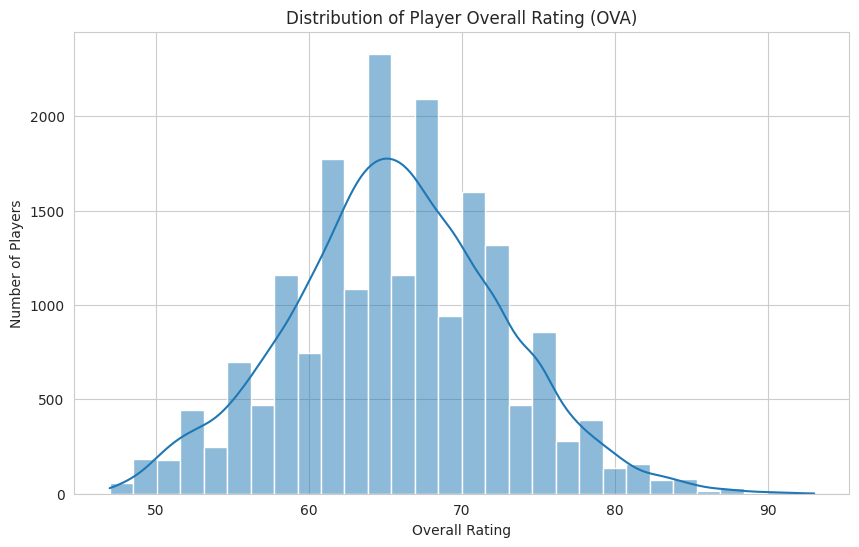

In [ ]:
# Create a histogram of the Overall (OVA) rating
plt.figure(figsize=(10, 6))
sns.histplot(df['↓OVA'], bins=30, kde=True)
plt.title('Distribution of Player Overall Rating (OVA)')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.show()

In [ ]:
# --- Step 12 (Corrected) ---

# Sort the DataFrame by 'Value' in descending order
top_10_valuable = df.sort_values(by='Value', ascending=False)

print("Top 10 Most Valuable Players (Corrected):")
# Use capital 'W' for 'Wage'
print(top_10_valuable[['Name', '↓OVA', 'Value', 'Team', 'Wage']].head(10))

Top 10 Most Valuable Players (Corrected):
              Name  ↓OVA        Value                 Team      Wage
6        K. Mbappé    90  105500000.0  Paris Saint-Germain  160000.0
4        Neymar Jr    91   90000000.0  Paris Saint-Germain  270000.0
3     K. De Bruyne    91   87000000.0      Manchester City  370000.0
5   R. Lewandowski    91   80000000.0    FC Bayern München  240000.0
8         M. Salah    90   78000000.0            Liverpool  250000.0
9          S. Mané    90   78000000.0            Liverpool  250000.0
10     V. van Dijk    90   75500000.0            Liverpool  210000.0
2         J. Oblak    91   75000000.0      Atlético Madrid  125000.0
22     R. Sterling    88   72500000.0      Manchester City  270000.0
23         H. Kane    88   71000000.0    Tottenham Hotspur  220000.0


In [ ]:
# Let's find Messi and Ronaldo specifically
players_to_check = ['L. Messi', 'Cristiano Ronaldo']

print("Checking Messi and Ronaldo's data:")
print(df[df['Name'].isin(players_to_check)][['Name', '↓OVA', 'Team', 'Contract', 'Value', 'Wage']])

Checking Messi and Ronaldo's data:
                Name  ↓OVA          Team     Contract       Value      Wage
0           L. Messi    93  FC Barcelona  2004 ~ 2021  67500000.0  560000.0
1  Cristiano Ronaldo    92      Juventus  2018 ~ 2022  46000000.0  220000.0


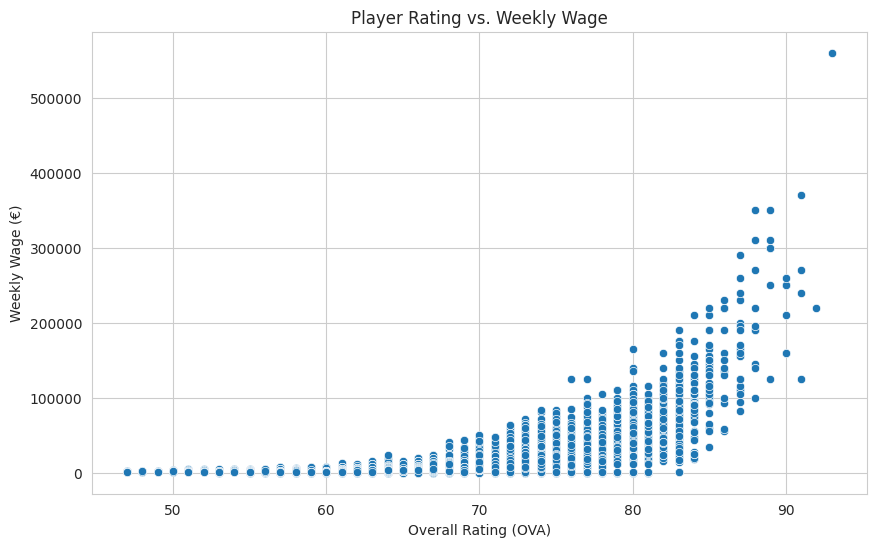

In [ ]:
# Create a scatter plot of Overall Rating (OVA) vs. Wage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='↓OVA', y='Wage', data=df)

plt.title('Player Rating vs. Weekly Wage')
plt.xlabel('Overall Rating (OVA)')
plt.ylabel('Weekly Wage (€)')
plt.show()

In [ ]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('fifa21_cleaned_data.csv', index=False)

print("Project 1 Complete: 'fifa21_cleaned_data.csv' has been saved!")

Project 1 Complete: 'fifa21_cleaned_data.csv' has been saved!
